In [4]:
import pandas as pd
data = pd.read_csv("dataset.csv")
data
data.head()
data.head()
data.isnull().sum()
data.fillna(data.mean(),inplace=True)

In [3]:
import pandas as pd
data = pd.read_csv("dataset.csv")
data

,Certificates,Attendance,Marks
0,2,90.0,85
1,1,92.0,78
2,3,NaN,92
3,0,94.0,76
4,2,86.0,89
5,1,92.0,95
6,2,90.0,82
7,3,91.0,88
8,0,88.0,75
9,2,93.0,90


In [5]:
data.head()


,Certificates,Attendance,Marks
0,2,90.000000,85
1,1,92.000000,78
2,3,90.947368,92
3,0,94.000000,76
4,2,86.000000,89


In [6]:
data.describe()

,Certificates,Attendance,Marks
count,20.000000,20.000000,20.000000
mean,1.600000,90.947368,85.200000
std,1.095445,2.625256,6.296198
min,0.000000,86.000000,75.000000
25%,1.000000,89.750000,79.750000
50%,2.000000,91.000000,85.500000
75%,2.250000,92.250000,90.250000
max,3.000000,95.000000,95.000000


In [7]:
data.isnull().sum()

Certificates    0
Attendance      0
Marks           0
dtype: int64

In [10]:
mean = data.fillna(data.mean(),inplace=True)

In [12]:
print(mean)

None


In [13]:
X = data.drop(columns="Marks")
y = data["Marks"]
print(X)
print(y)

    Certificates  Attendance
0              2   90.000000
1              1   92.000000
2              3   90.947368
3              0   94.000000
4              2   86.000000
5              1   92.000000
6              2   90.000000
7              3   91.000000
8              0   88.000000
9              2   93.000000
10             1   89.000000
11             3   95.000000
12             0   87.000000
13             2   90.000000
14             1   92.000000
15             3   91.000000
16             0   87.000000
17             2   94.000000
18             1   92.000000
19             3   95.000000
0     85
1     78
2     92
3     76
4     89
5     95
6     82
7     88
8     75
9     90
10    84
11    79
12    91
13    87
14    93
15    80
16    86
17    83
18    77
19    94
Name: Marks, dtype: int64


In [14]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [15]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

    Certificates  Attendance
7              3        91.0
0              2        90.0
18             1        92.0
6              2        90.0
17             2        94.0
10             1        89.0
4              2        86.0
12             0        87.0
16             0        87.0
14             1        92.0
8              0        88.0
9              2        93.0
11             3        95.0
3              0        94.0
15             3        91.0
13             2        90.0
    Certificates  Attendance
5              1   92.000000
1              1   92.000000
19             3   95.000000
2              3   90.947368
7     88
0     85
18    77
6     82
17    83
10    84
4     89
12    91
16    86
14    93
8     75
9     90
11    79
3     76
15    80
13    87
Name: Marks, dtype: int64
5     95
1     78
19    94
2     92
Name: Marks, dtype: int64


In [22]:
#PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()

X_scaled  = scaler.fit_transform(X)

pca_method = PCA(n_components=2)

X_pca = pca_method.fit_transform(X_scaled)

var = pca_method.explained_variance_ratio_

print(var)


[0.6969808 0.3030192]


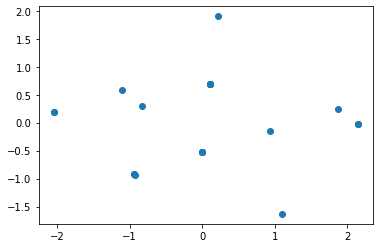

In [23]:
import matplotlib.pyplot as plt
plt.scatter(X_pca[:,0],X_pca[:,1])
plt.show()

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#y_train = y_train.astype(int)
#y_test = y_test.astype(int)

logreg = LogisticRegression()

logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

acrr = accuracy_score(y_test,y_pred)

print(acrr)

0.0


C:\Users\saichand.digumarthi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
from sklearn.metrics import classification_report
ccl = classification_report(y_test,y_pred)
print(ccl)

              precision    recall  f1-score   support

          78       0.00      0.00      0.00       1.0
          79       0.00      0.00      0.00       0.0
          80       0.00      0.00      0.00       0.0
          92       0.00      0.00      0.00       1.0
          93       0.00      0.00      0.00       0.0
          94       0.00      0.00      0.00       1.0
          95       0.00      0.00      0.00       1.0

    accuracy                           0.00       4.0
   macro avg       0.00      0.00      0.00       4.0
weighted avg       0.00      0.00      0.00       4.0



C:\Users\saichand.digumarthi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saichand.digumarthi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saichand.digumarthi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saichand.dig

In [32]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(y_test,y_pred)
print(kappa)

0.0
